In [6]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the dataset
df_youtube_spam = pd.read_csv("/content/drive/My Drive/Youtube-Spam-Dataset.csv")
df_youtube_spam = df_youtube_spam[['CONTENT', 'CLASS']]

In [5]:
df_youtube_spam.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [9]:
# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove special characters and punctuation
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)


    # Remove stop words, lemmatize, and remove words with length ≤ 2
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words and len(word) > 2]
    return ' '.join(words)


# Apply preprocessing function to 'CONTENT' column
df_youtube_spam['CONTENT'] = df_youtube_spam['CONTENT'].apply(preprocess_text)

# Display first few rows after preprocessing
df_youtube_spam.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,CONTENT,CLASS
0,huh anyway check channel kobyoshi,1
1,hey guy check new channel first vid monkey mon...,1
2,test say murdevcom,1
3,shaking sexy channel enjoy,1
4,watchvvtarggvgtwq check,1


<ipython-input-10-026972474712>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CLASS', data=df_youtube_spam, palette="viridis")


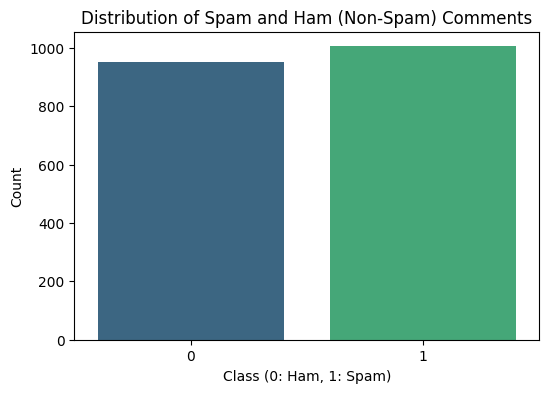

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='CLASS', data=df_youtube_spam, palette="viridis")
plt.title("Distribution of Spam and Ham (Non-Spam) Comments")
plt.xlabel("Class (0: Ham, 1: Spam)")
plt.ylabel("Count")
plt.show()
